# Skript zur Simulation des Pseudozufallalgorithmus
Diese Jupyter Notebook simuliert den verwendeten Pseudozufallsalgorithmus im elektronischen Würfel und illustriert verschiedene Kennzahlen.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
#from concurrent.futures import ThreadPoolExecutor

## Definition der Zufallsfunktion
Es existieren verschiedene Ansätze für einen Algorithmus um pseudozufällige Zahlen zu erzeugen. Schlussendlich haben wir uns für einen "einfachen" Algorithmus entschieden, da dieser in dieser Simulation die beste performance gezeigt hat.

In [2]:
def randomfunction(last, randint, nextnum):
    return (last + randint + nextnum) % 6

Anzahl der würfe fuer einen Durchgang

In [3]:
n = 1000000 # 1MIO #Anzahl der wuerfe

## Wurfverteilung bei gleichverteilten Timer0 Werten
Ein einzelner Durchgang mit _n_ würfen.

In [4]:
probs = pd.DataFrame(columns=[1,2,3,4,5,6])


Es wird 1000000 mal geworfen...
Timer0 Werte von: 255.0 bis 0.0
Nextnumber Werte von: 6.0 bis 1.0


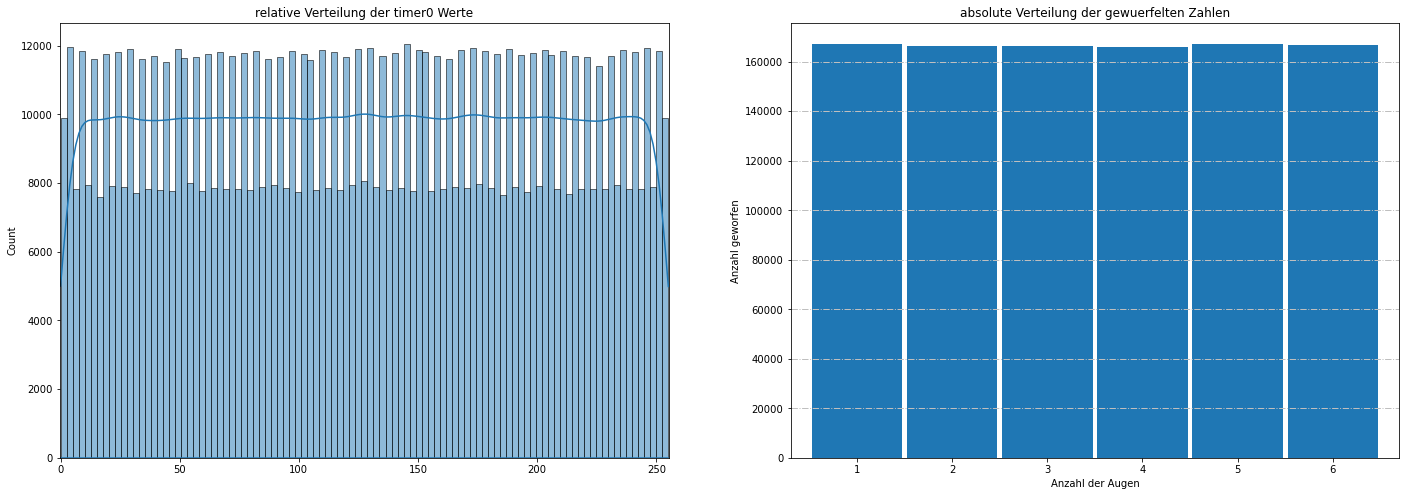

   absolut   relativ
1   167109  0.167109
2   166443  0.166443
3   166229  0.166229
4   166090  0.166090
5   167296  0.167296
6   166833  0.166833


In [5]:
print("\nEs wird",n,"mal geworfen...")
numbers = []

lastnumber = 6

rando = 255 * np.random.rand(n) + 0
nextn = 5 * np.random.rand(n) + 1

for i,r in enumerate(rando):
    rando[i] = round(r)

for i,r in enumerate(nextn):
    nextn[i] = round(r)


fig1 = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax.set_title('relative Verteilung der timer0 Werte')
sns.histplot(ax=ax, data=rando, kde=True)
sns.kdeplot(ax=ax, data=rando,  bw_adjust=2)
ax.set_xlim(-0.2,255.2)
print("Timer0 Werte von:", max(rando),"bis", min(rando))
print("Nextnumber Werte von:", max(nextn),"bis", min(nextn))

for r, nex in zip(rando,nextn):
    lastnumber = randomfunction(lastnumber, int(r), int(nex)) +1
    numbers.append(lastnumber)

labels, counts = np.unique(numbers, return_counts=True)


ax1.bar(labels, counts, align='center', width=0.95)
ax1.set_xticks(labels)
ax1.set_xlabel('Anzahl der Augen')
ax1.set_xlim(0.3,6.7)
ax1.set_ylabel('Anzahl geworfen')
ax1.set_title('absolute Verteilung der gewuerfelten Zahlen')
ax1.grid(color='0.75', linestyle='-.', linewidth=1, axis='y')
plt.show()


d = {'absolut': counts, 'relativ': counts/len(numbers)}
probs = pd.DataFrame(data=d, index=labels)

print(probs)

Nach 1.000.000 würfen hat sich eine relativ ausgeglichene Wahrscheinlichkeitsverteilung eingestellt.

## Validierung
Um einen statistisch aussagekräftigen Wert zu erhalten werden _anz_ Durchgange _mit_ n würfen simuliert, um einen Mittelwert zu ermitteln.

In [13]:
anz = 200
#print("Es wird",anz,"Runden",n,"mal gewürfelt...")
vali = pd.DataFrame(columns=[1, 2, 3, 4, 5, 6])

for indx in tqdm(range(0, anz)): #1.000.000.000
    #print("\nEs wird zum",indx,".",n,"mal geworfen...")
    numbers = []

    lastnumber = 6

    rando = 255 * np.random.rand(n) + 0
    nextn = 5 * np.random.rand(n) + 1

    for i,r in enumerate(rando):
        rando[i] = round(r)

    for i,r in enumerate(nextn):
        nextn[i] = round(r)

    for r, nex in zip(rando,nextn):
        lastnumber = randomfunction(lastnumber, int(r), int(nex)) +1
        numbers.append(lastnumber)

    labels, counts = np.unique(numbers, return_counts=True)
    #print(indx, labels, counts)
    #
    vali.loc[indx] = counts/len(numbers)

    #print(df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [25:10<00:00,  7.55s/it]


In [14]:
vali100=vali*100
vali100.describe()

1           2           3           4           5           6
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean    16.664314   16.667471   16.669261   16.669140   16.661469   16.668345
std      0.038238    0.035598    0.034963    0.033574    0.038494    0.035882
min     16.567300   16.558900   16.560500   16.578400   16.563000   16.576300
25%     16.637975   16.646850   16.646600   16.646675   16.633500   16.643500
50%     16.664300   16.666800   16.669450   16.668600   16.662700   16.668000
75%     16.687450   16.687775   16.688325   16.690875   16.686225   16.690350
max     16.766500   16.754700   16.764200   16.758100   16.768300   16.763300

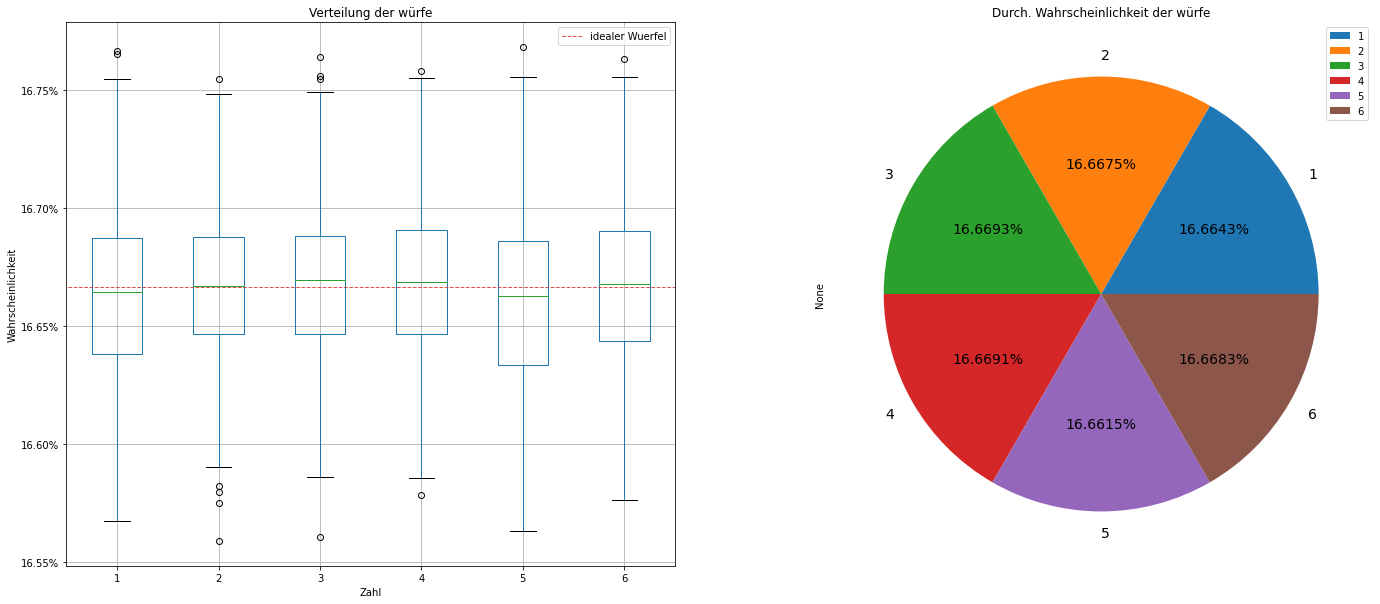

In [16]:
with PdfPages(f'wurfverteilung_{anz*n:.1E}.pdf') as pdf:
    fig = plt.figure(figsize=(24, 10))
    #boxplot
    ax1 = plt.subplot(121)
    ax1.set_title("Verteilung der würfe")
    ax1.set_ylabel('Wahrscheinlichkeit')
    fmt = '%0.2f%%' # Format you want the ticks, e.g. '40%'
    yticks = mtick.FormatStrFormatter(fmt)
    ax1.yaxis.set_major_formatter(yticks)
    #ax1.set_yticks()
    c
    vali100.boxplot(ax=ax1)
    ax1.axhline(16.6666,-1, 7, color='tab:red', linestyle='--', lw=1, alpha=0.8, label='idealer Wuerfel')
    ax1.legend()
    # piechart
    ax2 = plt.subplot(122)
    ax2.set_title("Durch. Wahrscheinlichkeit der würfe")
    mean = vali.mean()
    mean.plot(ax=ax2, kind='pie', y=1, autopct='%1.4f%%', fontsize=14)
    ax2.legend()
    pdf.savefig(fig, bbox_inches="tight", pad_inches=0)
    
plt.show()

Nach 100 x 1.000.000 würfen kann die relativ ausgeglichene Wahrscheinlichkeitsverteilung bestätigt werden. Die rote Linie kennzeichnet den ideal Würfel. Zu sehen ist auch, dass die drei mehr von Ausreißern betroffen ist als andere. Die 1 und die 3 sind beide leicht weniger Wahrscheinlich, was sich aber mit weiteren Würfelwürfen wieder relativieren könnte.

## Veranschaulichung des "Gesetzes der großen Zahlen"
Es werden die Warhrscheinlichkeiten mit steigender Anzahl _n_ der würfe ermittelt.

In [ ]:
#n = 1000000 #ende
df = pd.DataFrame(index=[1,2,3,4,5,6])
df['0'] = [0, 0, 0, 0, 0, 0]

for m in tqdm(range(5, n, 1000)):
    #print(f"Runde {m}")
    numbers = []

    lastnumber = 6

    rando = 255 * np.random.rand(m) + 0
    nextn = 5 * np.random.rand(m) + 1

    for i,r in enumerate(rando):
        rando[i] = round(r)

    for i,r in enumerate(nextn):
        nextn[i] = round(r)

    #wuerfeln
    for r, nex in zip(rando,nextn):
        lastnumber = randomfunction(lastnumber, int(r), int(nex)) +1
        numbers.append(lastnumber)

    labels, counts = np.unique(numbers, return_counts=True)
    
    throws = np.zeros(6)
    
    tmp_df = pd.DataFrame(index=labels)
    tmp_df[f'{m}'] = counts/len(numbers)
    df = pd.concat([df, tmp_df], axis=1, join="outer")
    #print(df)
    #df[f'{m}'] = counts/len(numbers)

#print(df)

In [ ]:
fig1 = plt.figure(figsize=(24, 8))

df.fillna(0)
#plotte einzelne zahlen

#df.iloc[0].plot()
#df.iloc[1].plot()
#df.iloc[2].plot()
df.iloc[3].plot()
#df.iloc[4].plot()
df.iloc[5].plot()

plt.axhline(0.166666,-1,1000001, color='black', linestyle='--', lw=2, alpha=0.9, label='idealer Wuerfel')
plt.title("Gesetz der Großen Zahlen")
plt.xlabel('Anzahl der wuerfe')
plt.ylabel('relative Wahrscheinlichkeit')
plt.xlim([0,400])
plt.ylim([0.14,0.20])
plt.legend()
plt.show()

Zu sehen ist, dass sie die Wahrscheinlichkeit mit steigender Anzahl der würfe an die theoretische Wahrscheinlichkeit eines Würfels annähert.

## Wurfverteilung bei normalverteilten Timer0 Werten
Testweise wird das erste Experiment mit normalverteilten timer0 Werten wiederholt. 

In [ ]:
print("Es wird",n,"mal geworfen...")
numbers = []

lastnumber = 6

rando = 33 * np.random.randn(n) + 127

nextn = 5 * np.random.rand(n) + 1

for i,r in enumerate(rando):
    if r > 255.:
        rando[i]=255.
    elif r < 0:
        rando[i]=0
    else:
        rando[i] = int(r)

for i,r in enumerate(nextn):
    nextn[i] = round(r)


fig1 = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax.set_title('relative Verteilung der timer0 Werte')
sns.histplot(ax=ax, data=rando, kde=True)
sns.kdeplot(ax=ax, data=rando,  bw_adjust=2)
ax.set_xlim(-0.2,255.2)
print("Timer0 Werte von:", max(rando),"bis", min(rando))
print("Nextnumber Werte von:", max(nextn),"bis", min(nextn))

for r, nex in zip(rando,nextn):
    lastnumber = randomfunction(lastnumber, int(r), int(nex)) +1
    numbers.append(lastnumber)
    
labels, counts = np.unique(numbers, return_counts=True)


ax1.bar(labels, counts, align='center', width=0.95)
ax1.set_xticks(labels)
ax1.set_xlabel('Anzahl der Augen')
ax1.set_xlim(0.3,6.7)
ax1.set_ylabel('Anzahl geworfen')
ax1.set_title('absolute Verteilung der gewuerfelten Zahlen')
ax1.grid(color='0.75', linestyle='-.', linewidth=1, axis='y')
plt.show()

d = {'absolut': counts, 'relativ': counts/len(numbers)}
probs2 = pd.DataFrame(data=d, index=labels)

print(probs2)

Zu sehen ist, dass die Wahrscheinlichkeit so gut wie unabhängig von der Verteilung der Timer0 Werte ist. Somit ist dieser Algorithmus robust gegenüber Schwankungen in der Wahrscheinlichkeitsdichtefunktion der timer0 Werte.

## Berechnung der Batteriedauer

In [4]:

    dauer = 10
    a1s = 20E-9
    apu = 30E-6
    aled = 2E-3

    a1 = 30E-6
    f1 = 1E+6
    f2 = 31E+3
    batt = 210E-3

In [13]:
anz = np.arange(1,7,1) # anzahl LEDs
aledm = np.mean(anz * aled)

print(f'{aledm}')

0.006999999999999999


In [150]:

def berechnewurfe(anz, dauer, a1, a1s, apu, aled, f1, f2, batt):

    fa1 = a1/f1

    a2 =  fa1 * f2

    batt = batt * 3600

    #print(batt)
    tmp = batt / (a2 + a1s + apu + (anz*aled))
    wrf = tmp / dauer

    return wrf


In [4]:
wurfe = []
for anz in (range(1,7,1)):
    dauer = 17
    a1s = 20E-9
    apu = 300E-6
    aled = 2E-3

    a1 = 30E-6
    f1 = 1E+6
    f2 = 31E+3
    batt = 210E-3

    fa1 = a1/f1
    a2 =  fa1 * f2
    batt = batt * 3600

    tmp = batt / (a2 + a1s + apu + (anz*aled))
    wrf = tmp / dauer
    wurfe.append(wrf)

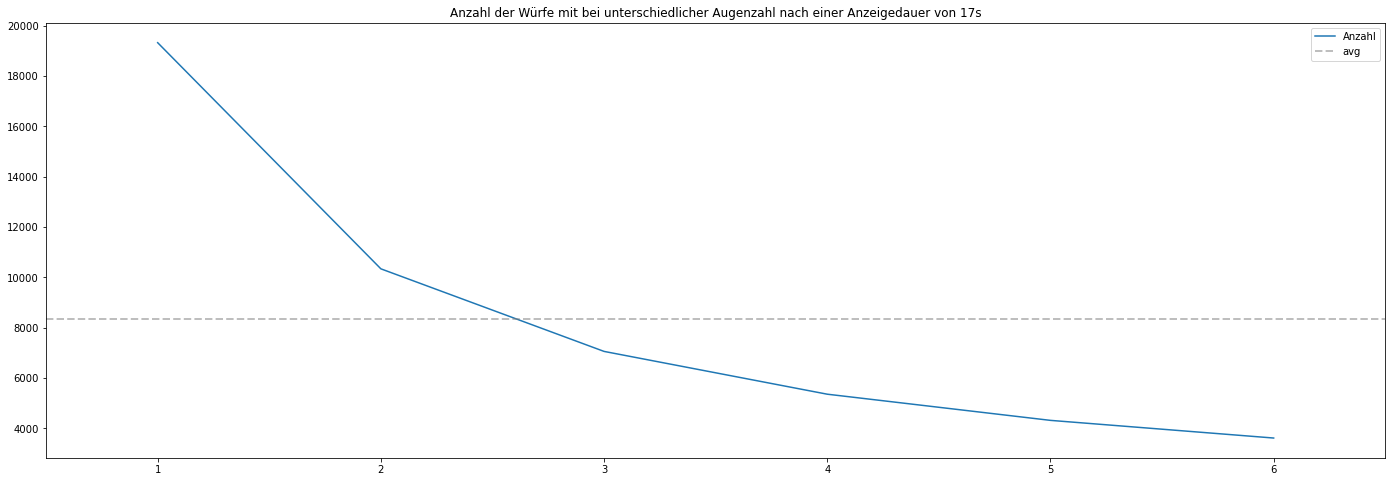

In [5]:
fig1 = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1])

ax.set_title(f'Anzahl der Würfe mit bei unterschiedlicher Augenzahl nach einer Anzeigedauer von {dauer}s')
ax.plot(range(1,7,1),wurfe, label='Anzahl')
ax.axhline(np.mean(wurfe),-0,6.5, color='tab:grey', linestyle='--', lw=2, alpha=0.5, label='avg')
ax.set_xlim(0.5,6.5)
ax.legend()
plt.show()

step = 0.001
maxdauer = 22
mindauer = 2

wurfe2 = []

anzahl = []
i = 0

for _ in (range(1, 7,1)):
    for _d in np.arange((maxdauer-mindauer) / 6 / step):
        anzahl.append(_)
#print(anzahl)
for dauer in np.arange(mindauer, maxdauer, step):
    #dauer = 10
    anz = anzahl[i]
    i+=1

    a1s = 20E-9
    apu = 300E-6
    aled = 2E-3

    a1 = 30E-6
    f1 = 1E+6
    f2 = 31E+3

    fa1 = a1/f1

    a2 =  fa1 * f2

    #
    #print(a2)
    batt = 210E-3
    batt = batt * 3600

    #print(batt)
    tmp = batt / (a2 + a1s + apu + (anz*aled))
    wrf = tmp / dauer
    wurfe2.append(wrf)

ax.fill_between(t, mu+sigma/2, mu-sigma/2, facecolor='tab:grey', alpha=0.1, label='std')

fig1 = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1])

ax.set_title(f'Anzahl der Würfe mit bei unterschiedlicher Wartezeit mit gleichverteilten Wurfergebnissen')
ax.plot(np.arange(mindauer, maxdauer, step), wurfe2, label='Anzahl')
ax.axhline(np.mean(wurfe2),mindauer-0.5,maxdauer+0.5, color='tab:grey', linestyle='--', lw=2, alpha=0.5, label='avg')
ax.set_xlim(mindauer-0.5, maxdauer+0.5)
ax.legend()
plt.show()

In [79]:
step = 0.1 
maxdauer = 360
mindauer = 2
dauer = np.arange(mindauer, maxdauer, step)

df = pd.DataFrame(index=np.arange(mindauer, maxdauer, step))

wurfe3 = []

anzahl = []
i = 0
anz = range(1,7,1)

dutysleep = 0.9

for anz in (range(1,7,1)):
    for d in dauer:
        #dauer = 10
        i+=1
        a2 =  12E-6
        a1s = 20E-9 #sleep

        apu2 = 30E-6

        aled = 2E-3 

        iled = np.mean(np.arange(1,7,1)*aled)

        iavg = ((a2 + apu2 + (anz * aled)) * (d - (d* dutysleep)) + (a1s + apu2) * (d * dutysleep)) / d
        #iavg2 = ((a2 + apu2 + iled) * (d/2) + (a1s + apu2) * (d/2)) / d
        #
        #print(a2)
        batt = 210E-3
        batt = batt * 3600 # mAs

        

        #print(batt)
        wrf = (batt / (d * iavg))
        #wrf = batt / ((a2 + apu2 + (anz * aled)) * d)
        #print(wrf)
        wurfe3.append(wrf)
        #print(f'Gesammtlaufzeit bei {anz} LEDs mit 10K PU: {(batt / (a2 + a1s + apu + (anz * aled)))/3600/24:.6} Tage')
        #print(f'Gesammtlaufzeit bei {anz} LEDs mit 100k PU: {(batt / (a2 + a1s + apu2 + (anz * aled)))/3600/24:.6} Tage')
    #print(f'Laufzeit im Sleepmode mit 10K PU: {(batt/(a1s+apu))/3600/24:.6} Tage')
    #print(f'Laufzeit im Sleepmode mit 100K PU: {(batt/(a1s+apu2))/3600/24:.6} Tage')
    #print(f'Laufzeit im Sleepmode ohne PU: {(batt/a1s)/3600/24/365.25:.6} Jahre\n')
    df[anz] = pd.Series(wurfe3, index= np.arange(mindauer, maxdauer, step))
    wurfe3 = []

In [54]:
print(np.median(df.iloc[280]))

35119.88622590949


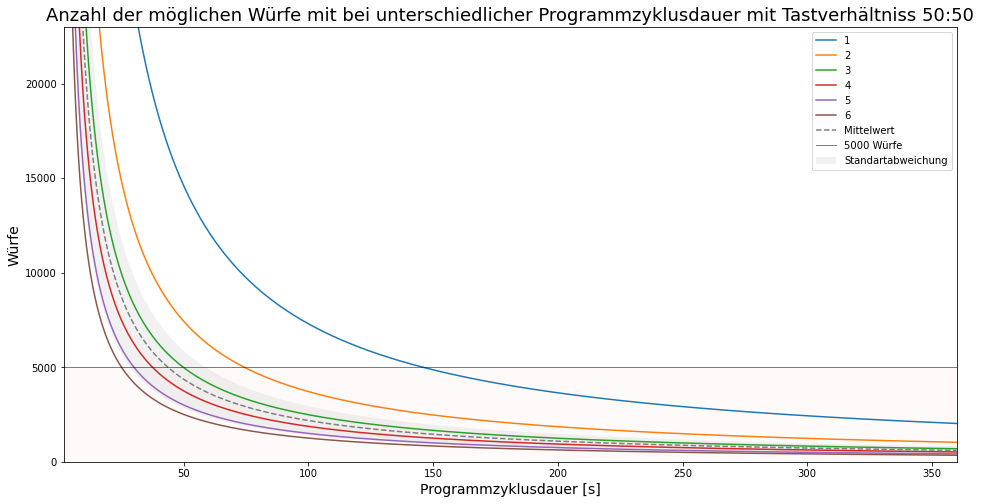

In [78]:
mu = df.median(axis=1)
sigma = df.std(axis=1)
t = np.arange(mindauer, maxdauer, step)




fig1 = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1])

ax.set_title(f'Anzahl der möglichen Würfe mit bei unterschiedlicher Programmzyklusdauer mit Tastverhältniss 50:50', fontsize=18)
df.plot(ax=ax)
mu.plot(ax=ax, color='tab:grey', linestyle='--', label='Mittelwert')
ax.fill_between(t, mu+sigma/3, mu-sigma/3, facecolor='tab:grey', alpha=0.1, label='Standartabweichung')
ax.axhline(5000,0, 25, color='black', linestyle='-', lw=1, alpha=0.5, label='5000 Würfe')
ax.fill_between(t,0 , 5000, facecolor='tab:red', alpha=0.02)

#ax.set_xlim(mindauer-0.01, 22)
ax.set_xlim(2 , 360)
ax.set_ylim(0, 23000)
ax.set_xlabel('Programmzyklusdauer [s]', fontsize=14)
ax.set_ylabel('Würfe', fontsize=14)
ax.legend()
plt.show()

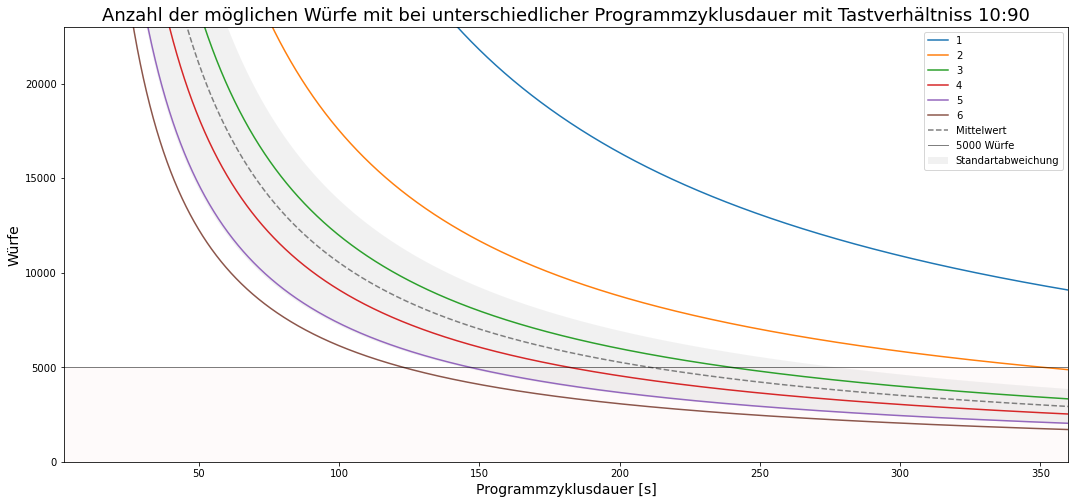

In [80]:
mu = df.median(axis=1)
sigma = df.std(axis=1)
t = np.arange(mindauer, maxdauer, step)




fig1 = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1])

ax.set_title(f'Anzahl der möglichen Würfe mit bei unterschiedlicher Programmzyklusdauer mit Tastverhältniss 10:90', fontsize=18)
df.plot(ax=ax)
mu.plot(ax=ax, color='tab:grey', linestyle='--', label='Mittelwert')
ax.fill_between(t, mu+sigma/3, mu-sigma/3, facecolor='tab:grey', alpha=0.1, label='Standartabweichung')
ax.axhline(5000,0, 25, color='black', linestyle='-', lw=1, alpha=0.5, label='5000 Würfe')
ax.fill_between(t,0 , 5000, facecolor='tab:red', alpha=0.02)

#ax.set_xlim(mindauer-0.01, 22)
ax.set_xlim(2 , 360)
ax.set_ylim(0, 23000)
ax.set_xlabel('Programmzyklusdauer [s]', fontsize=14)
ax.set_ylabel('Würfe', fontsize=14)
ax.legend()
plt.show()

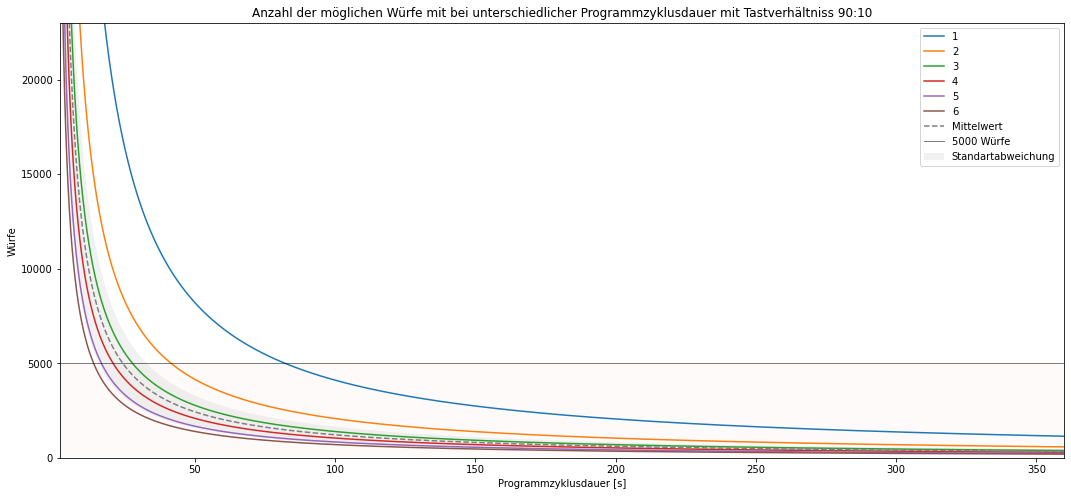

In [69]:
mu = df.median(axis=1)
sigma = df.std(axis=1)
t = np.arange(mindauer, maxdauer, step)




fig1 = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1])

ax.set_title(f'Anzahl der möglichen Würfe mit bei unterschiedlicher Programmzyklusdauer mit Tastverhältniss 90:10', fontsize=18)
df.plot(ax=ax)
mu.plot(ax=ax, color='tab:grey', linestyle='--', label='Mittelwert')
ax.fill_between(t, mu+sigma/3, mu-sigma/3, facecolor='tab:grey', alpha=0.1, label='Standartabweichung')
ax.axhline(5000,0, 25, color='black', linestyle='-', lw=1, alpha=0.5, label='5000 Würfe')
ax.fill_between(t,0 , 5000, facecolor='tab:red', alpha=0.02)

#ax.set_xlim(mindauer-0.01, 22)
ax.set_xlim(2 , 360)
ax.set_ylim(0, 23000)
ax.set_xlabel('Programmzyklusdauer [s]', fontsize=14)
ax.set_ylabel('Würfe', fontsize=14)
ax.legend()
plt.show()

In [77]:
step = 0.02 
maxdauer = 60
mindauer = 0.01

dauer = 15

sleep = np.arange(mindauer, maxdauer, step)

df = pd.DataFrame(index=np.arange(mindauer, maxdauer, step))

wurfe3 = []

anzahl = []
i = 0


for anz in (range(1,7,1)):
    for s in sleep:

        sle = s * 86400 #schlafen in sekunden

        
        i+=1

        a1s = 20E-9 #sleep
        apu = 300E-6
        apu2 = 30E-6

        aled = 2E-3

        #a1 = 30E-6
        

        #a2 =  (fa1 * f2) * d
        #print(a2)
        a2 =  12E-6 * d

        #
        #print(a2)
        batt = 210E-3
        batt = batt * 3600 # mAs

        #batt = batt - 

        #print(batt)
        wrf = (batt / ((a2 + apu) + ((a1s * s) + (apu * s)) + (anz * aled))) / 15
        #wrf = batt / ((a2 + apu2 + (anz * aled)) * d)
        wurfe3.append(wrf)

    df[anz] = pd.Series(wurfe3, index= np.arange(mindauer, maxdauer, step))
    wurfe3 = []

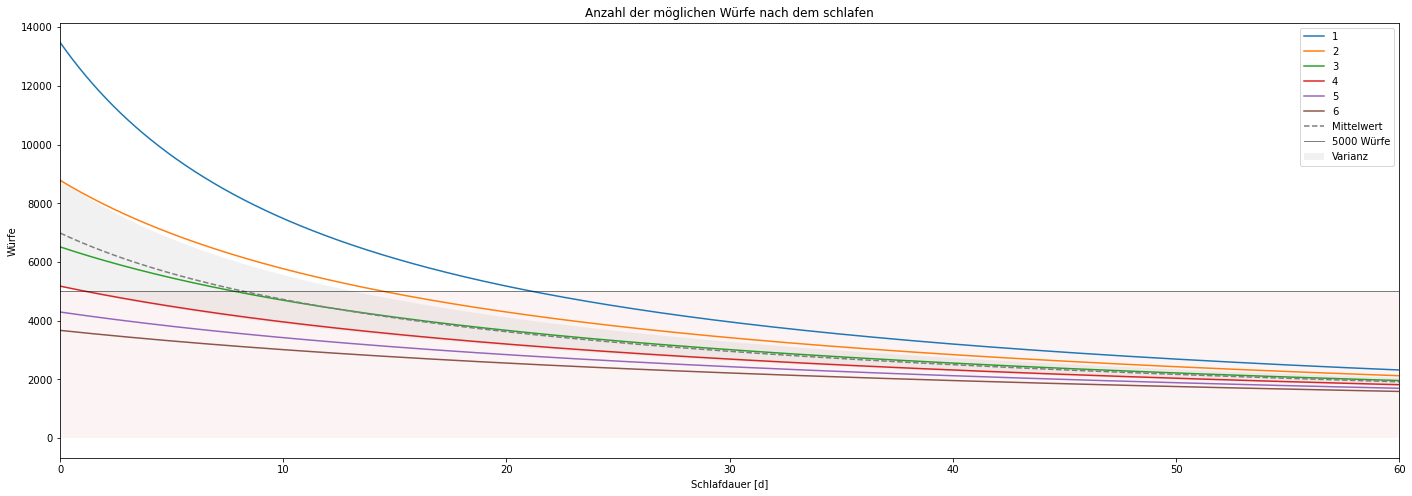

In [78]:
mu = df.mean(axis=1)
sigma = df.std(axis=1)
t = np.arange(mindauer, maxdauer, step)




fig1 = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1])

ax.set_title(f'Anzahl der möglichen Würfe nach dem schlafen')
df.plot(ax=ax)
mu.plot(ax=ax, color='tab:grey', linestyle='--', label='Mittelwert')
ax.fill_between(t, mu+sigma/2, mu-sigma/2, facecolor='tab:grey', alpha=0.1, label='Varianz')
ax.axhline(5000,0, 25, color='black', linestyle='-', lw=1, alpha=0.5, label='5000 Würfe')
ax.fill_between(t,0 , 5000, facecolor='tab:red', alpha=0.05)

#ax.set_xlim(mindauer-0.01, 22)
ax.set_xlim(0 , 60)
#ax.set_ylim(0, 23000)
ax.set_xlabel('Schlafdauer [d]')
ax.set_ylabel('Würfe')
ax.legend()
plt.show()

In [59]:

print(df.iloc[130])


1    5.621460e+09
2    3.662354e+09
3    2.715862e+09
4    2.158122e+09
5    1.790431e+09
6    1.529793e+09
Name: 15.00000000000001, dtype: float64


In [55]:
print(np.mean(df.iloc[130]))

9023.562748859864


print(df.head())

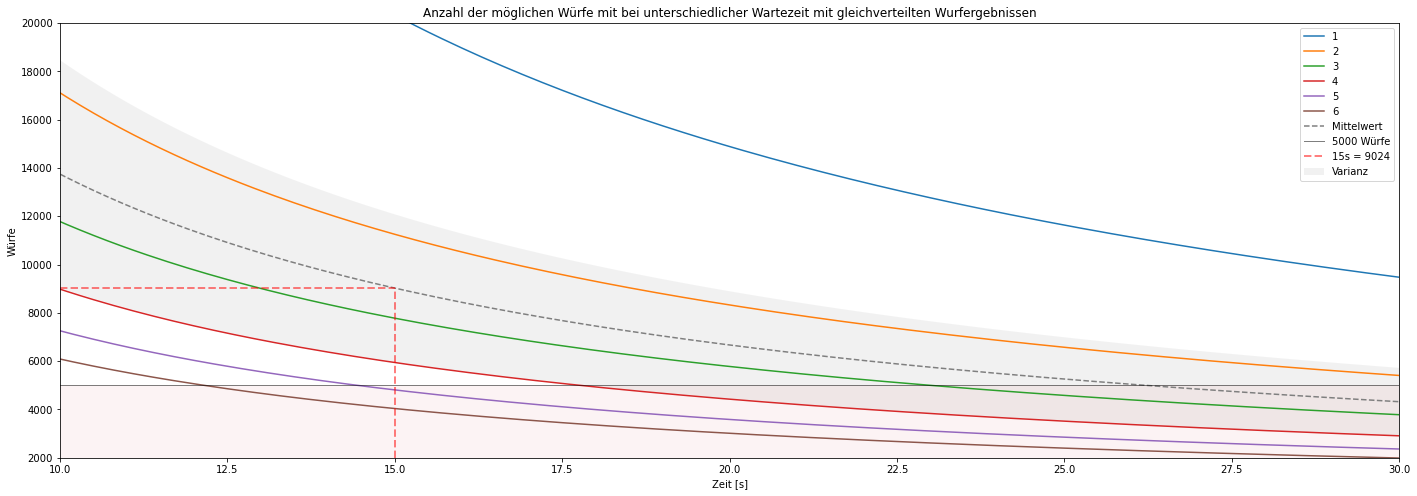

In [42]:
mu = df.mean(axis=1)
sigma = df.std(axis=1)
t = np.arange(mindauer, maxdauer, step)




fig1 = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 1)

ax = plt.subplot(gs[0])
#ax1 = plt.subplot(gs[1])

ax.set_title(f'Anzahl der möglichen Würfe mit bei unterschiedlicher Wartezeit mit gleichverteilten Wurfergebnissen')
df.plot(ax=ax)
mu.plot(ax=ax, color='tab:grey', linestyle='--', label='Mittelwert')
ax.fill_between(t, mu+sigma/2, mu-sigma/2, facecolor='tab:grey', alpha=0.1, label='Varianz')
ax.axhline(5000,0, 25, color='black', linestyle='-', lw=1, alpha=0.5, label='5000 Würfe')
ax.fill_between(t,0 , 5000, facecolor='tab:red', alpha=0.05)
#ax.scatter(15, mu.iloc[130])
ax.axhline(mu.iloc[130], 0.0, 0.25, color='red', linestyle='--', lw=2, alpha=0.5, label=f'15s = {round(mu.iloc[130])}')
ax.axvline(15, 0.0,0.39, color='red', linestyle='--', lw=2, alpha=0.5, label=None)
#ax.set_xlim(mindauer-0.01, 22)
ax.set_xlim(10, 30)
ax.set_ylim(2000, 20000)
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Würfe')
ax.legend()
plt.show()

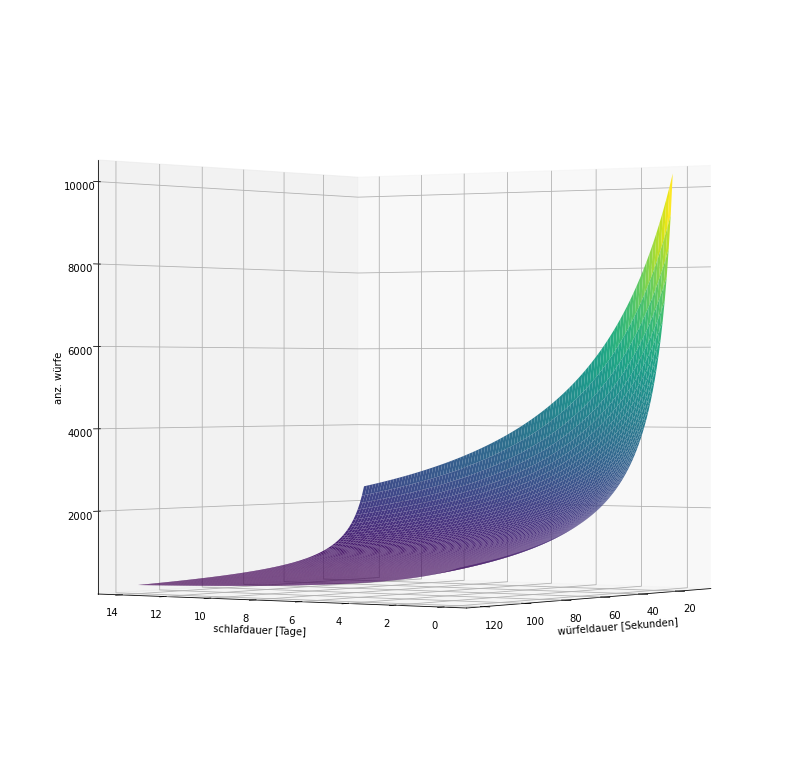

In [206]:

def f(dauer, sleep):
    #print(dauer,sleep)
    
    #dauer = 10

    sle = sleep * 86400 #schlafen in sekunden

    # strom µc @ 31kHz
    a1 =  12E-6
    # strom µc sleepmode
    a1s = 20E-9 
    #strom pullup
    apu = 300E-6
    apu2 = 30E-6

    awpu = 200E-6

    aled = 2E-3 #strom 1 LED
    anz = np.arange(1,7,1) # anzahl LEDs
    aledm = np.mean(anz * aled)


    

    #
    # batterie
    batt = 210E-3 #mAh
    batt = batt * 3600 # mAs

    slp = ( a1s) * sle
    #print(slp)
    #print(slp.shape)

    #print(batt)
    wrf = (batt / ((a1 + apu + slp) + (aledm))) / dauer

    return wrf


x = np.linspace(10, 120, 100) # würfeldauer in s
y = np.linspace(0.01, 14, 100) # schlafdauer in d
#print(x)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

#print(X[1:],Y[1:],Z[1:])
#print(Z)

fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('würfeldauer [Sekunden]')
ax.set_ylabel('schlafdauer [Tage]')
ax.set_zlabel('anz. würfe')
ax.view_init(0, 35)
ax.set_ylim(ax.get_ylim()[::-1])

plt.show()

In [166]:
print(X,Y,Z)

[[10.]] [[1.]] [[10339.14021023]]


In [164]:
print(X,Y,Z)

[[10.]] [[200.]] [[10333.51558229]]


In [170]:
print(X,Y,Z)

[[200.]] [[1.]] [[516.95701051]]


In [172]:
print(X,Y,Z)

[[200.]] [[200.]] [[516.67577911]]
